In [1]:
import pandas as pd
import pyodbc
from datetime import datetime
import time
import tqdm
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

F:\anaconda\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
server = 'DESKTOP-901337D\SQLEXPRESS
db = 'StockMarket'
conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + server + ';DATABASE=' + db + ';Trusted_COnnection=yes')
cursor = conn.cursor()

In [3]:
sql = 'SELECT  Tag FROM SecurityFundamentals' 
Tag = pd.read_sql(sql, conn)
print(Tag.shape)
sql1 = 'SELECT DISTINCT Tag FROM SecurityFundamentals'
TagUnic = pd.read_sql(sql1, conn)
print(TagUnic.shape)
Tag_Value_Count = Tag['Tag'].value_counts(dropna=False)
Tag_Value_Count

(6862636, 1)
(196, 1)


netincome                                    220462
netincomecontinuing                          219975
depreciationexpense                          138597
netincometocommon                            114787
totalpretaxincome                            114748
                                              ...  
capitalizedleaseobligationinterestexpense       159
bankersacceptances                              111
depletionexpense                                 53
extraordinaryincome                              32
policyholderfunds                                22
Name: Tag, Length: 196, dtype: int64

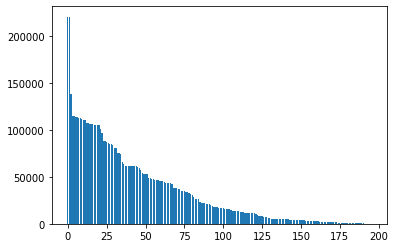

In [5]:
plt.bar(range(len(Tag_Value_Count)), Tag_Value_Count)
plt.show()

In [6]:
def calculate_quartile(Date):
    Date =  datetime.strptime(Date, '%Y-%m-%d').date()
    result = Date.year * 4 + (Date.month - 1) // 3
    return result

### First table (labels)

In [10]:
df = pd.DataFrame()
sql = 'SELECT DISTINCT Ticker FROM SecurityFundamentals'
tickers = pd.read_sql(sql, conn)
index = 0
for tick in tqdm.tqdm(tickers['Ticker']):
    dic = dict()
    print(tick)
    sql1 = "SELECT * FROM SecurityPrices WHERE Ticker='" + tick + "'"
    tickPrices = pd.read_sql(sql1, conn)
    tickPrices = tickPrices.sort_values(by=['Date'])
    tickPrices = tickPrices.reset_index()
    tickPrices['quartile'] = tickPrices.apply(lambda row: calculate_quartile(row.Date), axis=1)

    prev_q_close = None
    for x, y in tickPrices.groupby(['quartile']):
        q_close = y.iloc[-1].Close
        if prev_q_close == None:
            prev_q_close = y.iloc[0].Close
        dic['Ticker'] = tick
        dic['label'] = 1 if q_close - prev_q_close > 0 else 0
        dic['Q'] = x
        
        
        prev_q_close = q_close
        df = df.append(dic, ignore_index = True)

  0%|                                                                                         | 0/3644 [00:00<?, ?it/s]

A


  0%|                                                                               | 1/3644 [00:01<1:17:58,  1.28s/it]

AA


  0%|                                                                               | 2/3644 [00:02<1:12:53,  1.20s/it]

AAC


  0%|                                                                               | 3/3644 [00:03<1:05:20,  1.08s/it]

AAL


  0%|                                                                               | 4/3644 [00:04<1:02:32,  1.03s/it]

AAME


  0%|                                                                               | 5/3644 [00:04<1:01:10,  1.01s/it]

AAN


  0%|▏                                                                              | 6/3644 [00:05<1:01:41,  1.02s/it]

AAOI


  0%|▏                                                                                | 7/3644 [00:06<57:11,  1.06it/s]

AAON


  0%|▏                                                                                | 8/3644 [00:07<54:14,  1.12it/s]

AAP


  0%|▏                                                                                | 9/3644 [00:08<52:02,  1.16it/s]

AAPL


  0%|▏                                                                               | 10/3644 [00:09<50:49,  1.19it/s]

AAT


  0%|▏                                                                               | 11/3644 [00:09<51:32,  1.17it/s]

AAWW


  0%|▎                                                                               | 12/3644 [00:10<52:01,  1.16it/s]

AAXN


  0%|▎                                                                               | 13/3644 [00:11<53:18,  1.14it/s]

ABBV


  0%|▎                                                                               | 14/3644 [00:12<51:27,  1.18it/s]

ABC


  0%|▎                                                                               | 15/3644 [00:13<51:50,  1.17it/s]

ABCB


  0%|▎                                                                               | 16/3644 [00:14<51:26,  1.18it/s]

ABEO


  0%|▎                                                                               | 17/3644 [00:15<52:41,  1.15it/s]

ABG


  0%|▍                                                                               | 18/3644 [00:16<51:57,  1.16it/s]

ABIO


  1%|▍                                                                               | 19/3644 [00:16<50:14,  1.20it/s]

ABM


  1%|▍                                                                               | 20/3644 [00:17<48:58,  1.23it/s]

ABMC


  1%|▍                                                                               | 21/3644 [00:18<46:13,  1.31it/s]

ABMD


  1%|▍                                                                               | 22/3644 [00:19<47:18,  1.28it/s]

ABR


  1%|▌                                                                               | 23/3644 [00:19<48:31,  1.24it/s]

ABT


  1%|▌                                                                               | 24/3644 [00:20<49:37,  1.22it/s]

ABTX


  1%|▌                                                                               | 25/3644 [00:21<47:32,  1.27it/s]

ABUS


  1%|▌                                                                               | 26/3644 [00:22<45:39,  1.32it/s]

AC


  1%|▌                                                                               | 27/3644 [00:22<46:11,  1.30it/s]

ACAD


  1%|▌                                                                               | 28/3644 [00:23<50:44,  1.19it/s]

ACBI


  1%|▋                                                                               | 29/3644 [00:24<50:45,  1.19it/s]

ACC


  1%|▋                                                                               | 30/3644 [00:25<50:46,  1.19it/s]

ACCO


  1%|▋                                                                               | 31/3644 [00:26<51:38,  1.17it/s]

ACER


  1%|▋                                                                               | 32/3644 [00:27<54:25,  1.11it/s]

ACFN


  1%|▋                                                                               | 33/3644 [00:28<52:00,  1.16it/s]

ACGL


  1%|▋                                                                               | 34/3644 [00:29<51:53,  1.16it/s]

ACHC


  1%|▊                                                                               | 35/3644 [00:30<51:46,  1.16it/s]

ACHN


  1%|▊                                                                               | 36/3644 [00:31<53:28,  1.12it/s]

ACHV


  1%|▊                                                                               | 37/3644 [00:31<54:54,  1.09it/s]

ACIA


  1%|▊                                                                               | 38/3644 [00:32<50:22,  1.19it/s]

ACIW


  1%|▊                                                                               | 39/3644 [00:33<49:50,  1.21it/s]

ACLS


  1%|▉                                                                               | 40/3644 [00:34<51:28,  1.17it/s]

ACM


  1%|▉                                                                               | 41/3644 [00:35<51:01,  1.18it/s]

ACMR


  1%|▉                                                                               | 42/3644 [00:35<47:06,  1.27it/s]

ACN


  1%|▉                                                                               | 43/3644 [00:36<47:54,  1.25it/s]

ACNB


  1%|▉                                                                               | 44/3644 [00:37<50:43,  1.18it/s]

ACOR


  1%|▉                                                                               | 45/3644 [00:38<51:18,  1.17it/s]

ACRE


  1%|█                                                                               | 46/3644 [00:39<48:21,  1.24it/s]

ACRS


  1%|█                                                                               | 47/3644 [00:39<45:44,  1.31it/s]

ACRX


  1%|█                                                                               | 48/3644 [00:40<45:25,  1.32it/s]

ACTG


  1%|█                                                                               | 49/3644 [00:41<45:28,  1.32it/s]

ADBE


  1%|█                                                                               | 50/3644 [00:42<45:26,  1.32it/s]

ADC


  1%|█                                                                               | 51/3644 [00:42<45:13,  1.32it/s]

ADES


  1%|█▏                                                                              | 52/3644 [00:43<45:14,  1.32it/s]

ADI


  1%|█▏                                                                              | 53/3644 [00:44<45:00,  1.33it/s]

ADIL


  1%|█▏                                                                              | 54/3644 [00:44<41:36,  1.44it/s]

ADM


  2%|█▏                                                                              | 55/3644 [00:45<42:31,  1.41it/s]

ADMA


  2%|█▏                                                                              | 56/3644 [00:46<45:31,  1.31it/s]

ADMP


  2%|█▎                                                                              | 57/3644 [00:47<49:34,  1.21it/s]

ADMS


  2%|█▎                                                                              | 58/3644 [00:48<48:58,  1.22it/s]

ADNT


  2%|█▎                                                                              | 59/3644 [00:48<44:52,  1.33it/s]

ADOM


  2%|█▎                                                                              | 60/3644 [00:49<41:43,  1.43it/s]

ADP


  2%|█▎                                                                              | 61/3644 [00:50<42:32,  1.40it/s]

ADRO


  2%|█▎                                                                              | 62/3644 [00:50<40:40,  1.47it/s]

ADS


  2%|█▍                                                                              | 63/3644 [00:51<41:59,  1.42it/s]

ADSK


  2%|█▍                                                                              | 64/3644 [00:52<42:51,  1.39it/s]

ADSW


  2%|█▍                                                                              | 65/3644 [00:52<40:48,  1.46it/s]

ADT


  2%|█▍                                                                              | 66/3644 [00:53<38:47,  1.54it/s]

ADTN


  2%|█▍                                                                              | 67/3644 [00:54<40:30,  1.47it/s]

ADUS


  2%|█▍                                                                              | 68/3644 [00:55<41:21,  1.44it/s]

ADVM


  2%|█▌                                                                              | 69/3644 [00:55<40:29,  1.47it/s]

ADXS


  2%|█▌                                                                              | 70/3644 [00:56<45:53,  1.30it/s]

AEE


  2%|█▌                                                                              | 71/3644 [00:57<49:43,  1.20it/s]

AEGN


  2%|█▌                                                                              | 72/3644 [00:58<52:09,  1.14it/s]

AEHR


  2%|█▌                                                                              | 73/3644 [00:59<49:49,  1.19it/s]

AEIS


  2%|█▌                                                                              | 74/3644 [01:00<48:05,  1.24it/s]

AEL


  2%|█▋                                                                              | 75/3644 [01:01<56:35,  1.05it/s]

AEMD


  2%|█▋                                                                              | 76/3644 [01:02<55:49,  1.07it/s]

AEO


  2%|█▋                                                                              | 77/3644 [01:03<53:34,  1.11it/s]

AEP


  2%|█▋                                                                              | 78/3644 [01:03<52:40,  1.13it/s]

AERG


  2%|█▋                                                                              | 79/3644 [01:05<56:30,  1.05it/s]

AERI


  2%|█▊                                                                              | 80/3644 [01:05<56:01,  1.06it/s]

AES


  2%|█▊                                                                              | 81/3644 [01:06<53:25,  1.11it/s]

AEY


  2%|█▊                                                                              | 82/3644 [01:07<50:39,  1.17it/s]

AFG


  2%|█▊                                                                              | 83/3644 [01:08<48:47,  1.22it/s]

AFI


  2%|█▊                                                                              | 84/3644 [01:08<45:07,  1.31it/s]

AFL


  2%|█▊                                                                              | 85/3644 [01:09<44:55,  1.32it/s]

AGCO


  2%|█▉                                                                              | 86/3644 [01:10<44:49,  1.32it/s]

AGEN


  2%|█▉                                                                              | 87/3644 [01:11<44:35,  1.33it/s]

AGFS


  2%|█▉                                                                              | 88/3644 [01:11<42:27,  1.40it/s]

AGIO


  2%|█▉                                                                              | 89/3644 [01:12<41:20,  1.43it/s]

AGLE


  2%|█▉                                                                              | 90/3644 [01:13<40:03,  1.48it/s]

AGM


  2%|█▉                                                                              | 91/3644 [01:13<42:51,  1.38it/s]

AGM.A


  3%|██                                                                              | 92/3644 [01:14<48:21,  1.22it/s]

AGN


  3%|██                                                                              | 93/3644 [01:15<50:05,  1.18it/s]

AGNC


  3%|██                                                                              | 94/3644 [01:16<50:40,  1.17it/s]

AGO


  3%|██                                                                              | 95/3644 [01:17<50:32,  1.17it/s]

AGR


  3%|██                                                                              | 96/3644 [01:18<48:10,  1.23it/s]

AGRX


  3%|██▏                                                                             | 97/3644 [01:19<46:21,  1.28it/s]

AGTC


  3%|██▏                                                                             | 98/3644 [01:19<45:21,  1.30it/s]

AGX


  3%|██▏                                                                             | 99/3644 [01:20<46:37,  1.27it/s]

AGYS


  3%|██▏                                                                            | 100/3644 [01:21<46:34,  1.27it/s]

AHC


  3%|██▏                                                                            | 101/3644 [01:22<46:07,  1.28it/s]

AHH


  3%|██▏                                                                            | 102/3644 [01:22<44:15,  1.33it/s]

AHPI


  3%|██▏                                                                            | 103/3644 [01:23<45:12,  1.31it/s]

AHT


  3%|██▎                                                                            | 104/3644 [01:24<46:15,  1.28it/s]

AI


  3%|██▎                                                                            | 105/3644 [01:25<45:49,  1.29it/s]

AIG


  3%|██▎                                                                            | 106/3644 [01:25<45:29,  1.30it/s]

AIMC


  3%|██▎                                                                            | 107/3644 [01:27<54:04,  1.09it/s]

AIMT


  3%|██▎                                                                            | 108/3644 [01:28<57:09,  1.03it/s]

AIN


  3%|██▎                                                                            | 109/3644 [01:29<54:39,  1.08it/s]

AIR


  3%|██▍                                                                            | 110/3644 [01:29<52:09,  1.13it/s]

AIRG


  3%|██▍                                                                            | 111/3644 [01:30<48:30,  1.21it/s]

AIRI


  3%|██▍                                                                            | 112/3644 [01:31<48:40,  1.21it/s]

AIRT


  3%|██▍                                                                            | 113/3644 [01:32<50:17,  1.17it/s]

AIT


  3%|██▍                                                                            | 114/3644 [01:33<53:42,  1.10it/s]

AIV


  3%|██▍                                                                            | 115/3644 [01:34<55:58,  1.05it/s]

AIZ


  3%|██▌                                                                            | 116/3644 [01:35<54:32,  1.08it/s]

AJG


  3%|██▌                                                                            | 117/3644 [01:36<53:39,  1.10it/s]

AJRD


  3%|██▌                                                                            | 118/3644 [01:37<52:50,  1.11it/s]

AJX


  3%|██▌                                                                            | 119/3644 [01:37<49:07,  1.20it/s]

AKAM


  3%|██▌                                                                            | 120/3644 [01:38<50:52,  1.15it/s]

AKBA


  3%|██▌                                                                            | 121/3644 [01:39<52:30,  1.12it/s]

AKCA


  3%|██▋                                                                            | 122/3644 [01:40<48:50,  1.20it/s]

AKER


KeyboardInterrupt: 

In [ ]:
df.to_csv("labels.csv",sep=';', columns=['Q', 'Ticker','label'])
df.to_csv("labelsWithoutIndex.csv",sep=';', columns=['Q', 'Ticker','label'],index=False)

### Second table (features)

In [7]:
%%time
row_count = int(pd.read_sql('SELECT COUNT(*) FROM {table_name}'.format(
        table_name='SecurityFundamentals'), conn).values)
row_count

Wall time: 628 ms


6862636

In [8]:
%%time
df = pd.DataFrame()
chunksize = 1000000

offset = 1
i = 0

data = []
obj_name = []
feature_name = []

q_split = calculate_quartile("2017-01-01")

for i in tqdm.trange(int(row_count/chunksize + 1)):
    sql ="""
    SELECT StartDate,EndDate,Tag,Value,Ticker FROM SecurityFundamentals

    WHERE NewId>={m} and NewId<{n}
    """.format(n = chunksize + offset, m = offset)
    offset += chunksize
    tickPrices = pd.read_sql(sql, conn)
    date_list = tickPrices.EndDate.to_numpy()
    tick_list = tickPrices.Ticker.to_list()
    tag_list = tickPrices.Tag.to_list()
    value_list = tickPrices.Value.to_numpy()
    if(row_count - offset < chunksize) : chunksize = row_count-offset
    for j in range(0, chunksize):
        q = calculate_quartile(date_list[j])
        obj_name.append("{}_{}".format(tick_list[j], str(q)))
        feature_name.append(tag_list[j])
        data.append(value_list[j]) 

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:35<00:00, 13.60s/it]


Wall time: 1min 35s


### Csr_matrix

In [12]:
%%time
labels_pd = pd.read_csv("labelsWithoutIndex.csv", sep=';')
labels_info = []
for index, row in tqdm.tqdm(labels_pd.iterrows()):
    q = int(row.Q)
    tick = row.Ticker
    label = int(row.label)
    labels_info.append(("{}_{}".format(tick, q), label))

127150it [00:11, 10940.32it/s]


Wall time: 11.7 s


In [15]:
%%time
all_objects_info = zip(obj_name, feature_name, data)
print(all_objects_info)
all_objects_info_list = list(all_objects_info)
print(all_objects_info_list[0])
print(len(all_objects_info_list))

('AAPL_8077', 'weightedavedilutedsharesos', 4601380000.0)
5862635
Wall time: 1.12 s


#### len of all_objects_info_list

In [18]:
len(all_objects_info_list)

5862635

In [23]:
## найдем тикеры которые есть в обоих списках
filters_ids = set(map(lambda x: x[0], labels_info)) & set(map(lambda x: x[0], all_objects_info_list))

Напомним размеры каждого из списков

In [25]:
print('{}: {}'.format("filters ids ", len(filters_ids)))
print('{}: {}'.format("all_objects_info_list ids ", len(all_objects_info_list)))
print('{}: {}'.format("labels_info ", len(labels_info)))

filters ids : 93328
all_objects_info_list ids : 5862635
labels_info : 127150


Теперь надо оставить в all_objects_info и labels_info только те тикеры которые есть в обоих списках

In [26]:
all_objects_info = list(filter(lambda x: x[0] in filters_ids, all_objects_info_list))

In [27]:
labels_info = list(filter(lambda x: x[0] in filters_ids, labels_info))

Посмотрим размеры каждого списка

In [28]:
print('{}: {}'.format("all_objects_info_list ids ", len(all_objects_info)))
print('{}: {}'.format("labels_info ", len(labels_info)))

all_objects_info_list ids : 5545323
labels_info : 93328


На данном этапе имеем два списка  labels_info и all_objects_info_list в которых отсутсвуют лишние данные

Разобьем наши данные на train and test

q_split = calculate_quartile("2017-01-01")

In [30]:
all_objects_info_train = list()
all_objects_info_test = list()
labels_info_train = list()
labels_info_test = list()
for k in all_objects_info:
    if(int(k[0][-4:]) < q_split): all_objects_info_train.append(k)
    else: all_objects_info_test.append(k)
for k in labels_info:
    if(int(k[0][-4:]) < q_split) : labels_info_train.append(k)
    else: labels_info_test.append(k)

In [31]:
print("all_objects_info_train: ", len(all_objects_info_train))
print("all_objects_info_test: ", len(all_objects_info_test))
print("labels_info_train: ", len(labels_info_train))
print("labels_info_test: ", len(labels_info_test))

all_objects_info_train:  3779753
all_objects_info_test:  1765570
labels_info_train:  64463
labels_info_test:  28865


In [32]:
print('{}: {}'.format("Процент all_objects_info_train от all_objects_info ", str(int(len(all_objects_info_train)/len(all_objects_info)*100))+' %'))
print('{}: {}'.format("Процент all_objects_info_test от all_objects_info ", str(int(len(all_objects_info_test)/len(all_objects_info)*100))+' %'))
print('{}: {}'.format("Процент labels_info_train от labels_info ", str(int(len(labels_info_train)/len(labels_info)*100))+' %'))
print('{}: {}'.format("Процент labels_info_test от labels_info ", str(int(len(labels_info_test)/len(labels_info)*100))+' %'))

Процент all_objects_info_train от all_objects_info : 68 %
Процент all_objects_info_test от all_objects_info : 31 %
Процент labels_info_train от labels_info : 69 %
Процент labels_info_test от labels_info : 30 %


In [33]:
train_object_2_index = {x: i for i, x in enumerate(sorted(set(map(lambda x: x[0], labels_info_train))))}

In [36]:
labels_train = np.zeros(len(labels_info_train))
train_object_2_index = {x: i for i, x in enumerate(sorted(set(map(lambda x: x[0], labels_info_train))))}
for id, label in labels_info_train:
    labels_train[train_object_2_index[id]] = label
print('{}:{}'.format("labels_train",len(labels_train)))


labels_train:64463


In [37]:
labels_test = np.zeros(len(labels_info_test))
test_object_2_index = {x: i for i, x in enumerate(sorted(set(map(lambda x: x[0], labels_info_test))))}
for id, label in labels_info_test:
    labels_test[test_object_2_index[id]] = label
print('{}:{}'.format("labels_test",len(labels_test)))

labels_test:28865


In [45]:
data_train = list(map(lambda x: x[2], all_objects_info_train))
row2_ind_train = list(map(lambda x: train_object_2_index[x[0]], all_objects_info_train))
col2_ind_train = list(map(lambda x: feature_2_index[x[1]], all_objects_info_train))

data_test = list(map(lambda x: x[2], all_objects_info_test))
row2_ind_test = list(map(lambda x: test_object_2_index[x[0]], all_objects_info_test))
col2_ind_test = list(map(lambda x: feature_2_index[x[1]], all_objects_info_test))

In [54]:
csr_train = csr_matrix((data_train, (row2_ind_train, col2_ind_train)), shape=(len(labels_train),len(feature_2_index)))
csr_test = csr_matrix((data_test, (row2_ind_test, col2_ind_test)), shape = (len(labels_test),len(feature_2_index)))

In [47]:
print("XTrain shape: {}".format(csr_train.shape))
print("XTest shape: {}".format(csr_test.shape))
print("YTrain shape: {}".format(len(labels_train)))
print("YTest shape: {}".format(len(labels_test)))

XTrain shape: (64463, 196)
XTest shape: (28865, 196)
YTrain shape: 64463
YTest shape: 28865


In [48]:
%%time
xgb1 = XGBClassifier(n_estimators=1000, metrics=['auc'], max_depth=3)
xgb1.fit(csr_train, labels_train)

Wall time: 2min 17s


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              metrics=['auc'], min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [49]:
y_predicted = xgb1.predict(csr_test)

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(labels_test, y_predicted)
metrics.auc(fpr, tpr)

0.5405630092724366

In [51]:
accuracy = accuracy_score(labels_test, y_predicted)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.80%


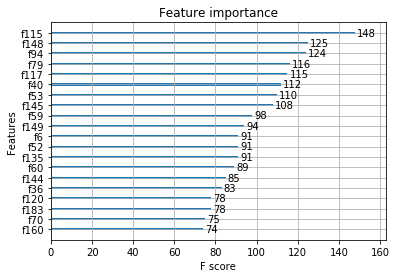

In [52]:
t = xgb.plot_importance(xgb1, max_num_features=20)

In [53]:
booster = xgb1.get_booster()
importance = booster.get_score(importance_type="weight")

In [54]:
importance =sorted(importance.items(), key=lambda x: x[1], reverse=True)

In [55]:
tag_name = []
for k in importance[:30]:
    tag_name.append(feature_name[int(k[0][1:])])

In [89]:
feature_name[115]

'goodwill'

In [90]:
tn, fp, fn, tp = metrics.confusion_matrix(labels_test, y_predicted).ravel()

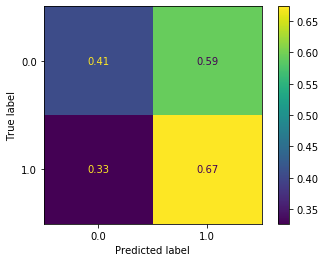

In [91]:
metrics.plot_confusion_matrix(xgb1, csr_test,labels_test,normalize='true')